In [70]:
# Project for  finding a long call and long  Put price RSG stock for upto two week expiry.  
# The cost basis should be optimum. 

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
import datetime
import yfinance as yf
from yahoo_fin import options as opt
import yfinance as yf
from py_vollib.black_scholes import black_scholes
from datetime import datetime, timedelta

In [72]:
# Input your stock
ticker="RSG"
expiry ="2023-08-18"

In [73]:
df=yf.download(ticker, start="2022-08-08",end="2023-08-08", interval="1d")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-08,142.830002,144.300003,141.699997,142.839996,140.804550,1202700
2022-08-09,143.449997,144.240005,142.550003,142.820007,140.784851,714300
2022-08-10,144.600006,144.600006,142.339996,142.940002,140.903152,770100
2022-08-11,143.130005,143.190002,141.179993,141.800003,139.779388,1353400
2022-08-12,142.250000,144.759995,141.949997,144.710007,142.647919,1494800
...,...,...,...,...,...,...
2023-08-01,153.449997,156.649994,151.639999,152.089996,152.089996,1909600
2023-08-02,152.300003,153.509995,151.880005,152.570007,152.570007,1244100
2023-08-03,151.929993,152.500000,148.990005,149.119995,149.119995,1632500


In [74]:
# Getting the last closing price
stock_price = df["Close"].iloc[-1]

In [75]:
print("Stock Price: ", stock_price)

Stock Price:  148.88999938964844


In [76]:
df["Change"]=df["Close"]-df["Close"].shift(1)
df["Volume/Change"]= df["Volume"]/df["Change"]
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Change,Volume/Change
Date,,,,,,,,
2022-08-09,143.449997,144.240005,142.550003,142.820007,140.784851,714300,-0.019989,-3.573463e+07
2022-08-10,144.600006,144.600006,142.339996,142.940002,140.903152,770100,0.119995,6.417761e+06
2022-08-11,143.130005,143.190002,141.179993,141.800003,139.779388,1353400,-1.139999,-1.187194e+06
2022-08-12,142.250000,144.759995,141.949997,144.710007,142.647919,1494800,2.910004,5.136763e+05
2022-08-15,144.679993,146.399994,143.949997,145.990005,143.909683,942400,1.279999,7.362507e+05
...,...,...,...,...,...,...,...,...
2023-08-01,153.449997,156.649994,151.639999,152.089996,152.089996,1909600,0.979996,1.948580e+06
2023-08-02,152.300003,153.509995,151.880005,152.570007,152.570007,1244100,0.480011,2.591816e+06
2023-08-03,151.929993,152.500000,148.990005,149.119995,149.119995,1632500,-3.450012,-4.731867e+05


In [77]:
new_df = df.sort_values("Volume/Change")
print(new_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-04  136.139999  136.679993  135.210007  136.119995  135.675079   
2023-02-01  123.440002  126.029999  122.010002  124.790001  123.925537   
2023-05-02  145.160004  145.970001  143.690002  144.960007  144.486191   
2023-05-08  145.429993  147.059998  145.350006  145.839996  145.363297   
2023-01-27  123.629997  124.040001  122.519997  123.849998  122.992043   
...                ...         ...         ...         ...         ...   
2023-04-11  134.539993  135.860001  133.809998  135.059998  134.618546   
2022-11-29  136.139999  136.880005  135.309998  136.649994  135.189621   
2023-05-12  148.600006  149.300003  147.690002  148.190002  147.705627   
2023-05-05  144.919998  146.809998  144.889999  145.860001  145.383240   
2023-05-11  147.850006  148.360001  147.039993  148.119995  147.635849   

             Volume    Change  Volume

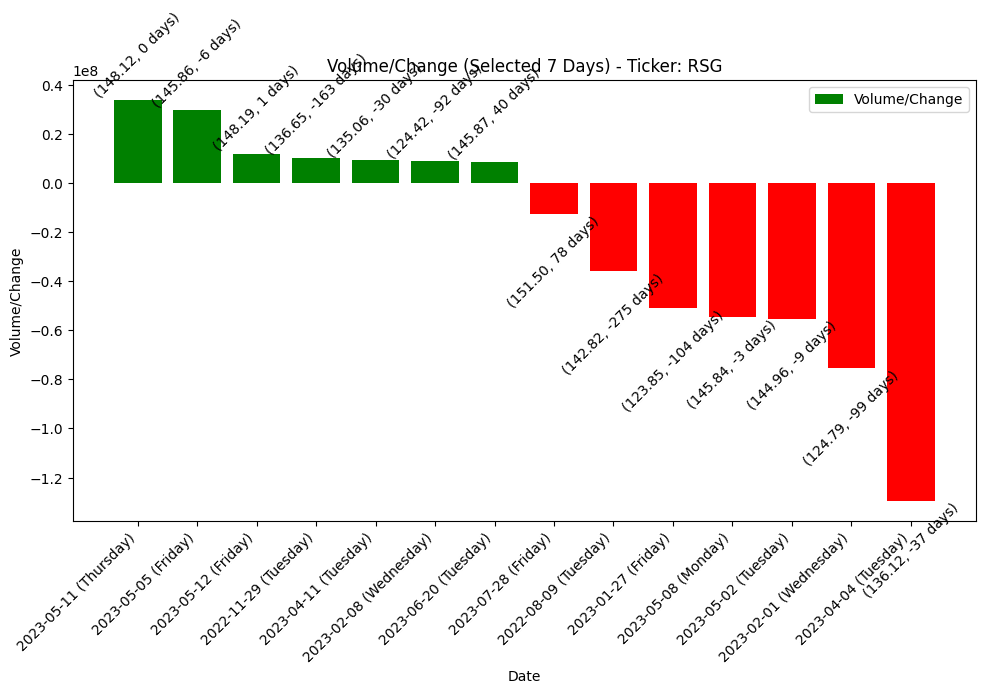

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Sort the DataFrame by "Volume/Change" in descending order
sorted_df = new_df.sort_values("Volume/Change", ascending=False)

# Get the last 7 days and first 7 days from the sorted DataFrame
last_7_days = sorted_df.tail(7)
first_7_days = sorted_df.head(7)

# Concatenate the last 7 days and first 7 days into a single DataFrame
selected_days = pd.concat([first_7_days, last_7_days])

# Creating a list of colors based on positive and negative values
colors = ["green" if vol_change >= 0 else "red" for vol_change in selected_days["Volume/Change"]]

# Convert the index to datetime
selected_days.index = pd.to_datetime(selected_days.index)

# Creating a range of indices for the x-axis
x_indices = np.arange(len(selected_days))

# Increase the figure size
plt.figure(figsize=(10, 7))

# Plotting the selected "Volume/Change" data with colored bars
plt.bar(x_indices, selected_days["Volume/Change"], color=colors, label="Volume/Change")

# Plotting the closing values and number of days as text on top of the histogram bars for positive Volume/Change
for i, closing_value in enumerate(selected_days["Close"]):
    if selected_days["Volume/Change"].iloc[i] > 0:
        diff_days = selected_days.index[i] - selected_days.index[0]
        text = f'({closing_value:.2f}, {diff_days.days} days)'
        plt.text(x_indices[i], selected_days["Volume/Change"].iloc[i], text, ha='center', va='bottom', rotation=45)
    else:
        diff_days = selected_days.index[i] - selected_days.index[0]
        text = f'({closing_value:.2f}, {diff_days.days} days)'
        plt.text(x_indices[i], selected_days["Volume/Change"].iloc[i], text, ha='center', va='top', rotation=45)

# Format the x-axis tick labels as "YYYY-MM-DD (Day)"
date_labels = [datetime.datetime.strftime(date, "%Y-%m-%d (%A)") for date in selected_days.index]
plt.xticks(x_indices, date_labels, rotation=45, ha='right')

plt.xlabel("Date")
plt.ylabel("Volume/Change")
plt.title("Volume/Change (Selected 7 Days) - Ticker: " + ticker)
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
# To find out Average of first 7 for Call strike , average of last 7 closing values for put strike
call_strike1 = first_7_days["Close"].mean()
put_strike1 = last_7_days["Close"].mean()

In [80]:
# Printing the Call Price and Put Price
print("call_strike: ", call_strike1)
print("put_strike: " , put_strike1)

call_strike:  140.59571184430803
put_strike:  138.55428641183036


In [81]:
# Rounding function to nearest five multiples
def round_to_nearest_multiple(value, multiple):
    return round(value / multiple) * multiple

# Assuming call_strike and put_strike are the original values
call_strike = round_to_nearest_multiple(call_strike1,5)
put_strike = round_to_nearest_multiple(put_strike1, 5)

# Printing the rounded values
print("Rounded call_strike: ", call_strike)
print("Rounded put_strike: ", put_strike)

Rounded call_strike:  140
Rounded put_strike:  140


In [82]:
# Stock selected "RSG", 

In [83]:
# Define the stock symbol and expiry date
stock = ticker
expiry = expiry
# Retrieve options chain for the specified stock and expiry
options_chain = opt.get_options_chain(stock, expiry)
# Filter the options chain to get call options only
calls = options_chain["calls"]
# Select the specific call option you are interested in
# For example, let's assume the call option has a strike price of $150
strike_price = call_strike  # Call strike price
selected_call = calls[calls["Strike"] == strike_price]

In [84]:
calls

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,RSG230818C00120000,2023-08-04 3:03PM EDT,120.0,29.60,28.4,30.60,0.00,-,32,32,90.33%
1,RSG230818C00130000,2023-06-26 9:35AM EDT,130.0,17.00,21.6,23.10,0.00,-,-,2,112.35%
2,RSG230818C00140000,2023-08-01 9:32AM EDT,140.0,13.20,8.0,10.00,0.00,-,1,6,43.90%
3,RSG230818C00145000,2023-08-07 2:00PM EDT,145.0,5.23,4.4,4.70,0.00,-,10,21,23.63%
4,RSG230818C00150000,2023-08-09 12:56PM EDT,150.0,0.90,0.9,1.05,0.25,+38.46%,6,228,15.87%
5,RSG230818C00155000,2023-08-07 3:34PM EDT,155.0,0.15,0.0,0.35,0.00,-,3,178,21.66%
6,RSG230818C00160000,2023-08-03 9:46AM EDT,160.0,0.33,0.0,0.25,0.00,-,14,98,30.08%
7,RSG230818C00165000,2023-08-01 1:22PM EDT,165.0,0.07,0.0,0.05,0.00,-,-,10,29.69%
8,RSG230818C00180000,2023-06-22 1:07PM EDT,180.0,0.35,0.0,0.15,0.00,-,-,1,52.73%
9,RSG230818C00185000,2023-06-22 1:06PM EDT,185.0,0.20,0.0,2.35,0.00,-,-,0,99.22%


In [85]:
calls["Open Interest"].tail()

5    178
6     98
7     10
8      1
9      0
Name: Open Interest, dtype: int64

In [86]:
# Define the stock symbol
stock_symbol = ticker

# Define the expiry date
expiry_date = expiry

# Retrieve the stock data
stock = yf.Ticker(stock_symbol)

# Retrieve the options data for the specified expiry date
options = stock.option_chain(expiry_date)
puts = options.puts

# Display the put option data
print(f"Put Option Data for {stock_symbol} with Expiry Date: {expiry_date}")
print(puts)

Put Option Data for RSG with Expiry Date: 2023-08-18
       contractSymbol             lastTradeDate  strike  lastPrice   bid  \
0  RSG230818P00135000 2023-08-03 17:24:26+00:00   135.0       0.10   0.0   
1  RSG230818P00140000 2023-08-07 17:52:26+00:00   140.0       0.25   0.0   
2  RSG230818P00145000 2023-08-09 17:56:03+00:00   145.0       0.40   0.3   
3  RSG230818P00150000 2023-08-09 17:09:19+00:00   150.0       2.45   1.8   
4  RSG230818P00155000 2023-08-08 16:58:38+00:00   155.0       7.60   5.9   
5  RSG230818P00160000 2023-08-09 15:56:20+00:00   160.0      12.60  10.7   
6  RSG230818P00165000 2023-07-18 16:23:02+00:00   165.0      15.74  15.6   

     ask    change  percentChange  volume  openInterest  impliedVolatility  \
0   0.25  0.000000       0.000000       1             3           0.386237   
1   0.25  0.000000       0.000000       1            76           0.269050   
2   0.45 -0.450000     -52.941174       1           442           0.178475   
3   2.00  0.500000      25

In [87]:


# Define the contract symbol for Apple stocks
contract_symbol = ticker

# Create a Ticker object for the contract symbol
contract = yf.Ticker(contract_symbol)

# Retrieve historical data for the stock
historical_data = contract.history(period="1d")

# Get the latest market price from the historical data
latest_market_price = historical_data["Close"].iloc[-1]

# Retrieve options data for the specified expiry date
options = contract.option_chain(date="2023-08-18")

# Get the call options data
calls = options.calls

# Iterate over the call options and calculate the Greeks
for index, call in calls.iterrows():
    strike_price = call["strike"]
    last_price = call["lastPrice"]
    risk_free_rate = 0.05
    time_to_expiration = 0.5
    implied_volatility = 0.2
    
    # Calculate the option price using the Black-Scholes model
    option_price = black_scholes('c', latest_market_price, strike_price, risk_free_rate, time_to_expiration, implied_volatility)
    
    # Calculate the Greeks manually
    delta = (black_scholes('c', latest_market_price + 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility) -
             black_scholes('c', latest_market_price - 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility)) / 0.02
    
    gamma = (black_scholes('c', latest_market_price + 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility) -
             2 * option_price +
             black_scholes('c', latest_market_price - 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility)) / 0.01 ** 2
    
    theta = -(black_scholes('c', latest_market_price, strike_price, risk_free_rate, time_to_expiration + 1/365, implied_volatility) -
              option_price)
    
    vega = (black_scholes('c', latest_market_price, strike_price, risk_free_rate, time_to_expiration, implied_volatility + 0.01) -
            option_price)
    
    rho = (black_scholes('c', latest_market_price, strike_price, risk_free_rate + 0.01, time_to_expiration, implied_volatility) -
           option_price)
    
    print(f"Option Greeks for Call Option (Strike: {strike_price})")
    print(f"Delta: {delta}")
    print(f"Gamma: {gamma}")
    print(f"Theta: {theta}")
    print(f"Vega: {vega}")
    print(f"Rho: {rho}")
    print("-----------------------------------")


Option Greeks for Call Option (Strike: 120.0)
Delta: 0.9999999659182635
Gamma: 2.8492763703980017e-08
Theta: -0.016031392944508838
Vega: 1.3522057429327106e-07
Rho: 0.5837257089111532
-----------------------------------
Option Greeks for Call Option (Strike: 130.0)
Delta: 0.9998446081104007
Gamma: 8.992170563715263e-05
Theta: -0.01736415873406827
Vega: 0.00027444445099078507
Rho: 0.6327568955043077
-----------------------------------
Option Greeks for Call Option (Strike: 140.0)
Delta: 0.9743545229003558
Gamma: 0.008970490767978845
Theta: -0.018173334959472598
Vega: 0.021732744069497656
Rho: 0.7004639364167193
-----------------------------------
Option Greeks for Call Option (Strike: 145.0)
Delta: 0.8778633483069509
Gamma: 0.03043013088621649
Theta: -0.016831594021538443
Vega: 0.06953966046484883
Rho: 0.7409800912607425
-----------------------------------
Option Greeks for Call Option (Strike: 150.0)
Delta: 0.657742768126246
Gamma: 0.05518937233439658
Theta: -0.012860036051986157
Vega:

In [88]:
# Iterate over the put options and calculate the Greeks
puts = options.puts
for index, put in puts.iterrows():
    strike_price = put["strike"]
    last_price = put["lastPrice"]
    
    # Calculate the option price using the Black-Scholes model
    option_price = black_scholes('p', latest_market_price, strike_price, risk_free_rate, time_to_expiration, implied_volatility)
    
    # Calculate the Greeks manually
    delta = (black_scholes('p', latest_market_price + 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility) -
             black_scholes('p', latest_market_price - 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility)) / 0.02
    
    gamma = (black_scholes('p', latest_market_price + 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility) -
             2 * option_price +
             black_scholes('p', latest_market_price - 0.01, strike_price, risk_free_rate, time_to_expiration, implied_volatility)) / 0.01 ** 2
    
    theta = -(black_scholes('p', latest_market_price, strike_price, risk_free_rate, time_to_expiration + 1/365, implied_volatility) -
              option_price)
    
    vega = (black_scholes('p', latest_market_price, strike_price, risk_free_rate, time_to_expiration, implied_volatility + 0.01) -
            option_price)
    
    rho = (black_scholes('p', latest_market_price, strike_price, risk_free_rate + 0.01, time_to_expiration, implied_volatility) -
           option_price)
    
    print(f"Option Greeks for Put Option (Strike: {strike_price})")
    print(f"Delta: {delta}")
    print(f"Gamma: {gamma}")
    print(f"Theta: {theta}")
    print(f"Vega: {vega}")
    print(f"Rho: {rho}")
    print("-----------------------------------")

Option Greeks for Put Option (Strike: 135.0)
Delta: -0.0028702922784463233
Gamma: 0.0013209110197396484
Theta: 5.903790098291117e-05
Vega: 0.0035161721646399975
Rho: 0.00408947502152888
-----------------------------------
Option Greeks for Put Option (Strike: 140.0)
Delta: -0.025645477098561187
Gamma: 0.008970490752435722
Theta: 0.0005299576191865468
Vega: 0.02173274406949631
Rho: 0.019450949241287013
-----------------------------------
Option Greeks for Put Option (Strike: 145.0)
Delta: -0.1221366516920036
Gamma: 0.030430130873448924
Theta: 0.002539673292072664
Vega: 0.0695396604648491
Rho: 0.035645211686188394
-----------------------------------
Option Greeks for Put Option (Strike: 150.0)
Delta: -0.3422572318727557
Gamma: 0.055189372321073904
Theta: 0.007179205996575622
Vega: 0.12267535480329084
Rho: -0.022822682217009893
-----------------------------------
Option Greeks for Put Option (Strike: 155.0)
Delta: -0.6281251919650455
Gamma: 0.056819828175846965
Theta: 0.013342471663846833

In [89]:
#  Greeks (Delta, Theta, Gamma, Vega) for Call option, using Black-Scholes model..
from scipy.stats import norm
import math

def black_scholes_greeks(S, K, T, r, sigma, option_type):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        delta = norm.cdf(d1)
        theta = -S * norm.pdf(d1) * sigma / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * norm.cdf(d2)
    else: # For put option
        delta = norm.cdf(d1) - 1
        theta = -S * norm.pdf(d1) * sigma / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * norm.cdf(-d2)

    gamma = norm.pdf(d1) / (S * sigma * math.sqrt(T))
    vega = S * norm.pdf(d1) * math.sqrt(T)

    return delta, theta, gamma, vega

S = 147.27       # Current stock price
K = call_strike       # Call Option strike price
T = 0.025        # Time until expiration in years
r = 0.03         # Risk-free interest rate
sigma = 0.2      # Volatility
option_type = 'call' # Type of option, can be 'call' or 'put'
delta, theta, gamma, vega = black_scholes_greeks(S, K, T, r, sigma, option_type)

print(f"Delta: {delta}\nTheta: {theta}\nGamma: {gamma}\nVega: {vega}")


Delta: 0.9495429670849219
Theta: -13.64709862914561
Gamma: 0.022307162786442278
Vega: 2.419039247131931


In [90]:
#  Fair value of Call price
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

S = stock_price       # Current stock price
K = call_strike       # Call Option strike price
T = 0.025        # Time until expiration in years
r = 0.03         # Risk-free interest rate
sigma = 0.2      # Volatility

call_price = black_scholes_call_price(S, K, T, r, sigma)
print(f"Call Price: {call_price}")

Call Price: 9.036869344715484


In [91]:
# Greeks (Delta, Theta, Gamma, Vega) for Put option, using Black-Scholes model.
from scipy.stats import norm
import math

def black_scholes_greeks(S, K, T, r, sigma, option_type):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        delta = norm.cdf(d1)
        theta = -S * norm.pdf(d1) * sigma / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * norm.cdf(d2)
    else: # For put option
        delta = norm.cdf(d1) - 1
        theta = -S * norm.pdf(d1) * sigma / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * norm.cdf(-d2)

    gamma = norm.pdf(d1) / (S * sigma * math.sqrt(T))
    vega = S * norm.pdf(d1) * math.sqrt(T)

    return delta, theta, gamma, vega

S = 147.27       # Current stock price
K = put_strike      # Call Option strike price
T = 0.025        # Time until expiration in years
r = 0.03         # Risk-free interest rate
sigma = 0.2      # Volatility
option_type = 'put' # Type of option, can be 'call' or 'put'
delta, theta, gamma, vega = black_scholes_greeks(S, K, T, r, sigma, option_type)

print(f"Delta: {delta}\nTheta: {theta}\nGamma: {gamma}\nVega: {vega}")


Delta: -0.05045703291507808
Theta: -9.450247448190868
Gamma: 0.022307162786442278
Vega: 2.419039247131931


In [92]:
# Fair value of Put price
def black_scholes_put_price(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    put_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

S = 148.77       # Current stock price
K = put_strike       # Put Option strike price
T = 0.025        # Time until expiration in years
r = 0.03         # Risk-free interest rate
sigma = 0.2      # Volatility

put_price = black_scholes_put_price(S, K, T, r, sigma)
print(f"Fair value of Put Price: {put_price}")

Fair value of Put Price: 0.04481497012058622


In [93]:
# A Fourier transform can be used in pricing European options under certain mathematical models. 
#The Carr-Madan method is one example that utilizes Fast Fourier Transform (FFT) to compute option prices

In [94]:
# Call option price calculation based on Carr_Madan formula

def carr_madan(S, K, T, r, sigma, alpha, N=1000):
    # Characteristic function
    def phi(u):
        return np.exp(1j * u * (np.log(S) + (r - sigma ** 2 / 2) * T) - sigma ** 2 * u ** 2 * T / 2)

    # Carr-Madan integral
    delta_u = 0.01  # Step size
    integral = 0.0
    for u in np.arange(0, N, delta_u):
        integral += np.real(np.exp(-1j * u * np.log(K)) * phi(u - (alpha + 1) * 1j))

    # Call price
    call_price = np.exp(-alpha * np.log(K)) * integral * delta_u / np.pi

    return call_price

# Parameters
S = 148.44
K = call_strike   # Call Option strike price
T = 0.025
r = 0.03
sigma = 0.2
alpha = 1.5
# Call option price calculation
call_price = carr_madan(S, K, T, r, sigma, alpha)
print(f"The call option price: {call_price}")

The call option price: 313.9920384094068


In [95]:
# Put option price calculation based on Carr_Madan formula

def carr_madan_put(S, K, T, r, sigma, alpha, N):
    # Characteristic function
    def phi(u):
        return np.exp(1j * u * (np.log(S) + (r - sigma ** 2 / 2) * T) - sigma ** 2 * u ** 2 * T / 2)

    # Carr-Madan integral
    delta_u = 0.01  # Step size
    integral = 0.0
    for u in np.arange(0, N, delta_u):
        integral += np.real(np.exp(-1j * u * np.log(K)) * phi(u - (alpha + 1) * 1j))

    # Call price
    call_price = np.exp(-alpha * np.log(K)) * integral * delta_u / np.pi

    # Put price using put-call parity
    put_price = call_price - S + K * np.exp(-r * T)

    return put_price

S = 148.44        # Current stock price
K = 135     # Put Option strike price
T = 0.025        # Time until expiration in years
r = 0.03       # Risk-free interest rate
sigma = 0.2    # Volatility
alpha = 1.5    # Damping factor
N = 1000

put_price = carr_madan_put(S, K, T, r, sigma, alpha, N)
print(f"The put option price is: {put_price}")

The put option price is: 5.141877698105759


In [96]:
#When we want to compute the price of a large number of options with the same maturity, the Lewis method is no more efficient.
#A solution is to take advantage of the FFT (Fast Fourier Transform) algorithm to reduce the computational cost.

In [97]:
# FFT method

In [98]:
ef fft_Lewis(K, S0, cf, interp="cubic"):
    """ 
    K = vector of strike
    S = spot price scalar
    cf = characteristic function
    interp can be cubic or linear
    """
    N=2**12                          # FFT more efficient for N power of 2
    B = 200                          # integration limit 
    dx = B/N
    x = np.arange(N) * dx            # the final value B is excluded

    weight = np.arange(N)            # Simpson weights
    weight = 3 + (-1)**(weight+1)
    weight[0] = 1; weight[N-1]=1

    dk = 2*np.pi/B
    b = N * dk /2
    ks = -b + dk * np.arange(N)

    integrand = np.exp(- 1j * b * np.arange(N)*dx) * cf(x - 0.5j) * 1/(x**2 + 0.25) * weight * dx/3
    integral_value = np.real( ifft(integrand)*N )
    
    if interp == "linear":
        spline_lin = interp1d(ks, integral_value, kind='linear')
        prices = S0 - np.sqrt(S0 * K) * np.exp(-r*T)/np.pi * spline_lin( np.log(S0/K) )
    elif interp == "cubic":
        spline_cub = interp1d(ks, integral_value, kind='cubic')
        prices = S0 - np.sqrt(S0 * K) * np.exp(-r*T)/np.pi * spline_cub( np.log(S0/K) )
    return prices

SyntaxError: invalid syntax (743565538.py, line 1)

In [ ]:
KK = np.arange(10,201,10)
print(KK)

In [ ]:
# Black Scholes
prices_BS_cub = fft_Lewis(KK, S0, cf_GBM, interp="cubic")
prices_BS_lin = fft_Lewis(KK, S0, cf_GBM, interp="linear")

print("BS linear interp Error:", np.linalg.norm(prices_BS_lin - BS_pricer.BlackScholes("call",S0,KK,T,r,sig),1) )
print("BS cubic spline Error:", np.linalg.norm(prices_BS_cub - BS_pricer.BlackScholes("call",S0,KK,T,r,sig),1) )

In [ ]:
# Merton
Merton_prices = np.zeros_like(KK, dtype=float)
for i in range(len(KK)):
    Merton.K = KK[i]
    Merton_prices[i] = Merton.closed_formula()

In [ ]:
# Merton
Merton_prices = np.zeros_like(KK, dtype=float)
for i in range(len(KK)):
    Merton.K = KK[i]
    Merton_prices[i] = Merton.closed_formula()

In [ ]:
# Variance Gamma
VG_prices = np.zeros_like(KK, dtype=float)
for i in range(len(KK)):
    VG.K = KK[i]
    VG_prices[i] = VG.Fourier_inversion()

In [ ]:
prices_VG_cub = fft_Lewis(KK, S0, cf_VG_b, interp="cubic")

In [ ]:
print("VG cubic spline error:", np.linalg.norm(prices_VG_cub-VG_prices, 1) )

In [ ]:
# ##########################  Payoff diagram #####################################################

In [ ]:
#Example 1: Short Strangle
#A short strangle is an options trading strategy that involve:
#(a)selling of a slightly out-of-the-money put and
#(b)a slightly out-of-the-money call of the same underlying stock and expiration date
op_1 = {'op_type':'c','strike':110,'tr_type':'s','op_pr':2}
op_2 = {'op_type':'p','strike':95,'tr_type':'s','op_pr':6}
op.multi_plotter(spot=100, op_list=[op_1,op_2])

In [ ]:
# Payoff diagram
#Example 2 : Iron Condor (Option strategy with 4 options)
#An iron condor is an options strategy consisting of two puts (one long and one short) and two calls (one long and one short),
#and four strike prices, all with the same expiration date.

#The stock currently trading at $212.26 (Spot Price)
#Option 1: Sell a call with a $215 strike, which gives $7.63 in premium
#Option 2: Buy a call with a strike of $220, which costs $5.35.
#Option 3: Sell a put with a strike of $210 with premium received $7.20
#Option 4: Buy a put with a strike of $205 costing $5.52.

op1={'op_type': 'c', 'strike': 215, 'tr_type': 's', 'op_pr': 7.63}
op2={'op_type': 'c', 'strike': 220, 'tr_type': 'b', 'op_pr': 5.35}
op3={'op_type': 'p', 'strike': 210, 'tr_type': 's', 'op_pr': 7.20}
op4={'op_type': 'p', 'strike': 205, 'tr_type': 'b', 'op_pr': 5.52}

op_list=[op1, op2, op3, op4]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list)

In [ ]:
#Plotting Real Options using Yahoo Finance API
#We can plot the option-payoff by providing the option ticker and other parameters(option type, transaction type and
#strike price) into the yf_plotter function.payoff diagram for Microsoft Inc. call option buyer, 
#who buys call option at strike price $235, MSFT is the stock ticker for Microsoft In
op_list=[{'tr_type':'b', 'op_type':'c', 'strike':235}]
op.yf_plotter('msft', spot_range=10, op_list=op_list)

In [ ]:
#Example 2: Strangle on Amazon
#Strangle is a strategy which involves simultaneous purchase of call option and put option near the spot price allowing the purchaser to make a profit whether the price of the stock goes up or down.

#Stock ticker : AMZN(Amazon Inc.)
#Amazon stock is currently trading around $3070. A straddle can be constructed by purchasing the following options:
#Option 1: Buy Call at Strike Price 3070
#Option 2: Buy Put option at Strike price 3070
#Option expiry date can be specified as parameter ‘exp’ in the format ‘YYYY-MM-DD’.
op_1={'op_type': 'c', 'strike':120, 'tr_type': 'b'}
op_2={'op_type': 'p', 'strike':120, 'tr_type': 'b'}
op.yf_plotter(ticker='amzn', exp='2023-07-21', op_list=[op_1, op_2])

In [ ]:
#4. Save figure
#Figure can be saved in the current directory setting save=True
#Filename with extension has to be provided as file.
#If no filename is provided, the figure will be saved as fig in png format.
op.single_plotter(save=True,file='simple_option.jpeg')

In [ ]:
####################### The End ###########################################